In [1]:
from statsmodels.formula.api import ols
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_indata(path):
    '''
    :param path: a string of path saved the dataset
    :return: pandas datarame
    '''
    data = pd.read_csv(path)
    return data


## generate new column year for every data

def generate_year_month(df, colname):
    '''
    :param df: dataframe we want to add column year and month
    :param colname: a stirng column name in the dataframe saved the dateandtime
    :return: dataframe after adding the column
    '''
    df['year'] = pd.DatetimeIndex(df[colname]).year
    df['month'] = pd.DatetimeIndex(df[colname]).month
    #df['indextype'] = str(string)
    return df

In [3]:
airpollution=pd.DataFrame()
airpollution_dir = './daily_aqi_by_cbsa/daily_aqi_by_cbsa_'
for i in range(2012,2018):
    file=read_indata(airpollution_dir+str(i)+'.csv')
    airpollution=airpollution.append(file)
airpollution.head()

#extract columns that need to analyze
#airpollution = airpollution[['City', 'Date Local', 'NO2 Mean','NO2 AQI', 'O3 Mean','O3 AQI','SO2 Mean','SO2 AQI','CO Mean','CO AQI']]

#extract columns that need to be analyzed
airpollution = airpollution[['CBSA', 'Date', 'AQI']]

airpollution.head()

,CBSA,Date,AQI
0,"Aberdeen, SD",2012-01-01,10
1,"Aberdeen, SD",2012-01-04,13
2,"Aberdeen, SD",2012-01-08,10
3,"Aberdeen, SD",2012-01-10,13
4,"Aberdeen, SD",2012-01-13,22


In [4]:
#generate year and month
airpollution = generate_year_month(airpollution, 'Date')
airpollution.head()

,CBSA,Date,AQI,year,month
0,"Aberdeen, SD",2012-01-01,10,2012,1
1,"Aberdeen, SD",2012-01-04,13,2012,1
2,"Aberdeen, SD",2012-01-08,10,2012,1
3,"Aberdeen, SD",2012-01-10,13,2012,1
4,"Aberdeen, SD",2012-01-13,22,2012,1


In [5]:
def city_groupby(df, colname, city_name):
    '''
    :param df: dataframe we want to divide base on city name
    :param colname: the column name in the dataframe saved the city name
    :param city_name: the specific city name 
    :return: dataframe after filter city and year from 2012 to 2018, group by year and month
    '''
    df = df[(df[colname].str.contains(city_name)) & (df.year>=2012) & (df.year<2018)]
    df = df.groupby(['year','month']).agg({'mean'})

    return df

In [6]:
Chicago_airpollution = city_groupby(airpollution, 'CBSA', 'Chicago')
Chicago_airpollution.head()
#airpollution[(airpollution['City']=='Chicago')]
#NYC_airpollution = city_groupby(airpollution, 'City', 'New York')
#NYC_airpollution.head()

#LA_airpollution = city_groupby(airpollution, 'City', 'Los Angeles')
#LA_airpollution.head()

AQI
                 mean
year month           
2012 1      68.387097
     2      73.551724
     3      76.387097
     4      63.400000
     5      78.290323

In [7]:
chicago_crime = read_indata('./Chicago_crime_2012-2017.csv')
chicago_crime.head()
## count chicago crime
#chi_crime_per_month = chicago_crime[['ID', 'year', 'month']].groupby(['year', 'month']).size()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11002368,JA329407,01/01/2012 12:00:00 AM,021XX N KENNETH AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,...,31.0,20.0,20,NaN,NaN,2012,11/27/2017 03:53:35 PM,NaN,NaN,NaN
1,9979416,HY169652,01/01/2012 12:00:00 AM,053XX W MONROE ST,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,...,29.0,25.0,17,1140801.0,1899144.0,2012,02/09/2018 03:44:29 PM,41.879335,-87.758468,"(41.879335159, -87.758467514)"
2,10433124,HZ170983,01/01/2012 12:00:00 AM,026XX N MC VICKER AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,RESIDENCE,True,False,...,29.0,19.0,17,NaN,NaN,2012,05/11/2016 03:48:18 PM,NaN,NaN,NaN
3,9888481,HX538405,01/01/2012 12:00:00 AM,066XX S MAY ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,17.0,68.0,11,1169793.0,1860812.0,2012,02/09/2018 03:44:29 PM,41.773566,-87.653128,"(41.773566189, -87.653127978)"
4,10593543,HZ344934,01/01/2012 12:00:00 AM,064XX W BELLE PLAINE AVE,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,...,38.0,17.0,17,NaN,NaN,2012,07/12/2016 03:53:40 PM,NaN,NaN,NaN


In [9]:
generate_year_month(chicago_crime, 'Date').head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,year,month
0,11002368,JA329407,01/01/2012 12:00:00 AM,021XX N KENNETH AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,...,20,NaN,NaN,2012,11/27/2017 03:53:35 PM,NaN,NaN,NaN,2012,1
1,9979416,HY169652,01/01/2012 12:00:00 AM,053XX W MONROE ST,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,...,17,1140801.0,1899144.0,2012,02/09/2018 03:44:29 PM,41.879335,-87.758468,"(41.879335159, -87.758467514)",2012,1
2,10433124,HZ170983,01/01/2012 12:00:00 AM,026XX N MC VICKER AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,RESIDENCE,True,False,...,17,NaN,NaN,2012,05/11/2016 03:48:18 PM,NaN,NaN,NaN,2012,1
3,9888481,HX538405,01/01/2012 12:00:00 AM,066XX S MAY ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,11,1169793.0,1860812.0,2012,02/09/2018 03:44:29 PM,41.773566,-87.653128,"(41.773566189, -87.653127978)",2012,1
4,10593543,HZ344934,01/01/2012 12:00:00 AM,064XX W BELLE PLAINE AVE,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,...,17,NaN,NaN,2012,07/12/2016 03:53:40 PM,NaN,NaN,NaN,2012,1


In [10]:
chicago_crime = chicago_crime[(chicago_crime.year>=2012) & (chicago_crime.year<2018)]
chi_crime_per_month = chicago_crime[['ID', 'year', 'month']].groupby(['year', 'month']).count().rename(columns={'ID':'count'})
chi_crime_per_month.head()

count
year month       
2012 1      26265
     2      23869
     3      28561
     4      27178
     5      30088

In [17]:
crime_airpollution = pd.merge(Chicago_airpollution, chi_crime_per_month,on=['year','month'])
crime_airpollution.columns=['AQI_mean', 'crime_count']
crime_airpollution.head()

C:\Users\yiwen\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:522: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


AQI_mean  crime_count
year month                        
2012 1      68.387097        26265
     2      73.551724        23869
     3      76.387097        28561
     4      63.400000        27178
     5      78.290323        30088

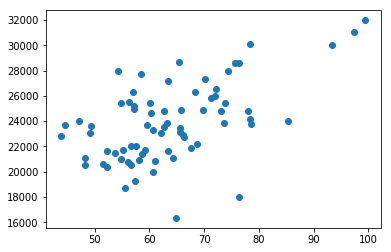

In [12]:
crime_airpollution.corr() 
plt.scatter(crime_airpollution.AQI_mean, crime_airpollution.crime_count)

In [13]:
chicago_crime_model = ols("crime_count ~ AQI_mean", data=crime_airpollution).fit()
chicago_crime_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            crime_count   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     30.94
Date:                Wed, 24 Apr 2019   Prob (F-statistic):           4.56e-07
Time:                        17:25:52   Log-Likelihood:                -667.16
No. Observations:                  72   AIC:                             1338.
Df Residuals:                      70   BIC:                             1343.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.431e+04   1748.218      8.185      0.000    1.08e+04    1.78e+04
AQI_mean     149.9422     26.958      5.562      0.000      96.176     203.708
==============================================================================
Omnibus:                        3.974   Durbin-Watson:                   0.857
Prob(Omnibus):                  0.137   Jarque-Bera (JB):                3.135
Skew:                          -0.410   Prob(JB):                        0.209
Kurtosis:                       3.609   Cond. No.                         371.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Air pollution in Los Angeles

In [14]:
LA_airpollution = city_groupby(airpollution, 'CBSA', 'Los Angeles')
LA_airpollution.head()

AQI
                  mean
year month            
2012 1       77.354839
     2       65.896552
     3       63.774194
     4       78.433333
     5      111.741935

In [15]:
#LA_crime = read_indata('./LA_Crime_Data_2010_2017.csv')
LA_crime = read_indata('./LA_Crime_Data_2010_to_Present.csv')
LA_crime.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,61000673,04/07/2016,04/07/2016,2043,10,West Valley,1037,886,DISTURBING THE PEACE,1501,...,NaN,IC,Invest Cont,886.0,NaN,NaN,NaN,17100 VANOWEN ST,NaN,"(34.1939, -118.5055)"
1,131609876,04/02/2016,04/01/2016,1900,19,Mission,1902,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),NaN,...,NaN,IC,Invest Cont,420.0,NaN,NaN,NaN,13600 DRONEFIELD AV,NaN,"(34.3196, -118.4561)"
2,150319258,08/20/2016,08/20/2016,30,3,Southwest,325,440,THEFT PLAIN - PETTY ($950 & UNDER),0344,...,NaN,AO,Adult Other,440.0,NaN,NaN,NaN,2800 MENLO AV,NaN,"(34.0294, -118.2903)"
3,151601466,01/01/2016,01/01/2016,2040,16,Foothill,1642,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0334 0411 1402,...,OTHER KNIFE,AA,Adult Arrest,230.0,998.0,NaN,NaN,10500 CAYUGA AV,NaN,"(34.2606, -118.4238)"
4,151601467,01/02/2016,01/02/2016,30,16,Foothill,1668,624,BATTERY - SIMPLE ASSAULT,0416,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624.0,NaN,NaN,NaN,9800 MARCUS AV,NaN,"(34.2463, -118.2818)"


In [16]:
generate_year_month(LA_crime, 'Date Occurred').head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location,year,month
0,61000673,04/07/2016,04/07/2016,2043,10,West Valley,1037,886,DISTURBING THE PEACE,1501,...,Invest Cont,886.0,NaN,NaN,NaN,17100 VANOWEN ST,NaN,"(34.1939, -118.5055)",2016,4
1,131609876,04/02/2016,04/01/2016,1900,19,Mission,1902,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),NaN,...,Invest Cont,420.0,NaN,NaN,NaN,13600 DRONEFIELD AV,NaN,"(34.3196, -118.4561)",2016,4
2,150319258,08/20/2016,08/20/2016,30,3,Southwest,325,440,THEFT PLAIN - PETTY ($950 & UNDER),0344,...,Adult Other,440.0,NaN,NaN,NaN,2800 MENLO AV,NaN,"(34.0294, -118.2903)",2016,8
3,151601466,01/01/2016,01/01/2016,2040,16,Foothill,1642,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0334 0411 1402,...,Adult Arrest,230.0,998.0,NaN,NaN,10500 CAYUGA AV,NaN,"(34.2606, -118.4238)",2016,1
4,151601467,01/02/2016,01/02/2016,30,16,Foothill,1668,624,BATTERY - SIMPLE ASSAULT,0416,...,Adult Other,624.0,NaN,NaN,NaN,9800 MARCUS AV,NaN,"(34.2463, -118.2818)",2016,1


In [18]:
LA_crime = LA_crime[(LA_crime.year>=2012) & (LA_crime.year<2018)]
LA_crime_per_month = LA_crime[['DR Number', 'year', 'month']].groupby(['year', 'month']).count().rename(columns={'DR Number':'count'})
LA_crime_per_month.head()

count
year month       
2012 1      17745
     2      15316
     3      16562
     4      16275
     5      17466

In [19]:
LA_crime_airpollution = pd.merge(LA_airpollution, LA_crime_per_month,on=['year','month'])
LA_crime_airpollution.head()
LA_crime_airpollution.columns=['AQI_mean', 'crime_count']
LA_crime_airpollution.head(15)

C:\Users\yiwen\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:522: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


AQI_mean  crime_count
year month                         
2012 1       77.354839        17745
     2       65.896552        15316
     3       63.774194        16562
     4       78.433333        16275
     5      111.741935        17466
     6      116.266667        17015
     7      123.677419        16956
     8      134.161290        17618
     9      104.300000        16955
     10      73.935484        17207
     11      77.400000        15750
     12      77.225806        16270
2013 1       66.548387        16623
     2       67.892857        14037
     3       83.838710        16177

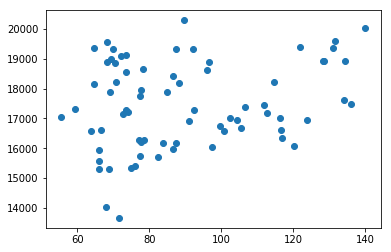

In [20]:
LA_crime_airpollution.corr() 
plt.scatter(LA_crime_airpollution.AQI_mean, LA_crime_airpollution.crime_count)

In [21]:
LA_crime_model = ols("crime_count ~ AQI_mean", data=LA_crime_airpollution).fit()
LA_crime_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            crime_count   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     4.530
Date:                Wed, 24 Apr 2019   Prob (F-statistic):             0.0368
Time:                        17:31:43   Log-Likelihood:                -623.86
No. Observations:                  72   AIC:                             1252.
Df Residuals:                      70   BIC:                             1256.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.605e+04    687.062     23.354      0.000    1.47e+04    1.74e+04
AQI_mean      15.7572      7.403      2.128      0.037       0.992      30.523
==============================================================================
Omnibus:                        3.024   Durbin-Watson:                   0.621
Prob(Omnibus):                  0.220   Jarque-Bera (JB):                1.721
Skew:                          -0.043   Prob(JB):                        0.423
Kurtosis:                       2.248   Cond. No.                         380.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""